In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA

In [25]:
#read in our dataset
df = pd.read_excel('breach_report.csv.xlsx')
df.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [26]:
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Adventist HealthCare,MD,Healthcare Provider,1300,2025-11-13,Loss,Paper/Films,Yes,NaN
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,2025-11-04,Unauthorized Access/Disclosure,Electronic Medical Record,No,NaN
2,Saint Maryâ€™s Home of Erie,PA,Healthcare Provider,501,2025-10-24,Hacking/IT Incident,Network Server,No,NaN
3,Conduent Business Services LLC,NJ,Business Associate,42616,2025-10-08,Hacking/IT Incident,Network Server,Yes,NaN
4,"Revere Health, PC",UT,Healthcare Provider,10800,2025-10-02,Hacking/IT Incident,Network Server,No,NaN
...,...,...,...,...,...,...,...,...,...
733,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,2023-10-12,Hacking/IT Incident,Network Server,No,NaN
734,"Aspen Dental Management, Inc.",NY,Business Associate,62183,2023-08-18,Hacking/IT Incident,Network Server,Yes,NaN
735,"TAG Urgent Care Support Services, LLC",NY,Business Associate,516985,2023-08-18,Hacking/IT Incident,Network Server,Yes,NaN
736,"ProSmile Holdings, LLC",NJ,Business Associate,39674,2023-03-28,Hacking/IT Incident,Email,Yes,NaN


**Cleaning**

In [27]:
#pca preprocessing
df.drop('Web Description', axis=1, inplace=True) #drop irrelevant columns
for col in df.columns:
  df[col] = df[col].astype(str).replace({'$': '', ',': '', '-': '', '—': ''}, regex=True)
df = df.dropna(axis=1, how='all')

df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,Adventist HealthCare,MD,Healthcare Provider,1300,20251113,Loss,Paper/Films,Yes
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,20251104,Unauthorized Access/Disclosure,Electronic Medical Record,No
2,Saint Maryâ€™s Home of Erie,PA,Healthcare Provider,501,20251024,Hacking/IT Incident,Network Server,No
3,Conduent Business Services LLC,NJ,Business Associate,42616,20251008,Hacking/IT Incident,Network Server,Yes
4,Revere Health PC,UT,Healthcare Provider,10800,20251002,Hacking/IT Incident,Network Server,No
...,...,...,...,...,...,...,...,...
733,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,20231012,Hacking/IT Incident,Network Server,No
734,Aspen Dental Management Inc.,NY,Business Associate,62183,20230818,Hacking/IT Incident,Network Server,Yes
735,TAG Urgent Care Support Services LLC,NY,Business Associate,516985,20230818,Hacking/IT Incident,Network Server,Yes
736,ProSmile Holdings LLC,NJ,Business Associate,39674,20230328,Hacking/IT Incident,Email,Yes


In [28]:
#making columns numerical
df['Individuals Affected'] = pd.to_numeric(df['Individuals Affected'], errors='coerce')
df['Breach Submission Date'] = pd.to_datetime(df['Breach Submission Date'], errors='coerce')
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,Adventist HealthCare,MD,Healthcare Provider,1300,2025-11-13,Loss,Paper/Films,Yes
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,2025-11-04,Unauthorized Access/Disclosure,Electronic Medical Record,No
2,Saint Maryâ€™s Home of Erie,PA,Healthcare Provider,501,2025-10-24,Hacking/IT Incident,Network Server,No
3,Conduent Business Services LLC,NJ,Business Associate,42616,2025-10-08,Hacking/IT Incident,Network Server,Yes
4,Revere Health PC,UT,Healthcare Provider,10800,2025-10-02,Hacking/IT Incident,Network Server,No
...,...,...,...,...,...,...,...,...
733,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,2023-10-12,Hacking/IT Incident,Network Server,No
734,Aspen Dental Management Inc.,NY,Business Associate,62183,2023-08-18,Hacking/IT Incident,Network Server,Yes
735,TAG Urgent Care Support Services LLC,NY,Business Associate,516985,2023-08-18,Hacking/IT Incident,Network Server,Yes
736,ProSmile Holdings LLC,NJ,Business Associate,39674,2023-03-28,Hacking/IT Incident,Email,Yes


**Encoding**

In [29]:
#Business associate, type of breach to binary
#Label encoding: State, covered entity type, location of breach information

encoder = LabelEncoder()
df['Location of Breached Information Encoded'] = encoder.fit_transform(df['Location of Breached Information'])
df['State Encoded'] = encoder.fit_transform(df['State'])
df['Covered Entity Type Encoded'] = encoder.fit_transform(df['Covered Entity Type'])

if 'Business Associate Present' in df.columns:
  df['Business Associate Present'] = df['Business Associate Present'].map({'Yes': 1, 'No': 0})
if 'Type of Breach' in df.columns:
  df['Type of Breach'] = df['Type of Breach'].map({'Hacking/IT Incident': 1, 'Unauthorized Access/Disclosure': 0})
df

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Location of Breached Information Encoded,State Encoded,Covered Entity Type Encoded
0,Adventist HealthCare,MD,Healthcare Provider,1300,2025-11-13,NaN,Paper/Films,1,23,19,3
1,Synergy Advanced Healthcare LLC,CT,Healthcare Provider,1260,2025-11-04,0.0,Electronic Medical Record,0,6,6,3
2,Saint Maryâ€™s Home of Erie,PA,Healthcare Provider,501,2025-10-24,1.0,Network Server,0,18,37,3
3,Conduent Business Services LLC,NJ,Business Associate,42616,2025-10-08,1.0,Network Server,1,18,30,0
4,Revere Health PC,UT,Healthcare Provider,10800,2025-10-02,1.0,Network Server,0,18,43,3
...,...,...,...,...,...,...,...,...,...,...,...
733,Premier Health Partners and wholly owned cover...,OH,Healthcare Provider,10833,2023-10-12,1.0,Network Server,0,18,34,3
734,Aspen Dental Management Inc.,NY,Business Associate,62183,2023-08-18,1.0,Network Server,1,18,33,0
735,TAG Urgent Care Support Services LLC,NY,Business Associate,516985,2023-08-18,1.0,Network Server,1,18,33,0
736,ProSmile Holdings LLC,NJ,Business Associate,39674,2023-03-28,1.0,Email,1,11,30,0


**PCA**

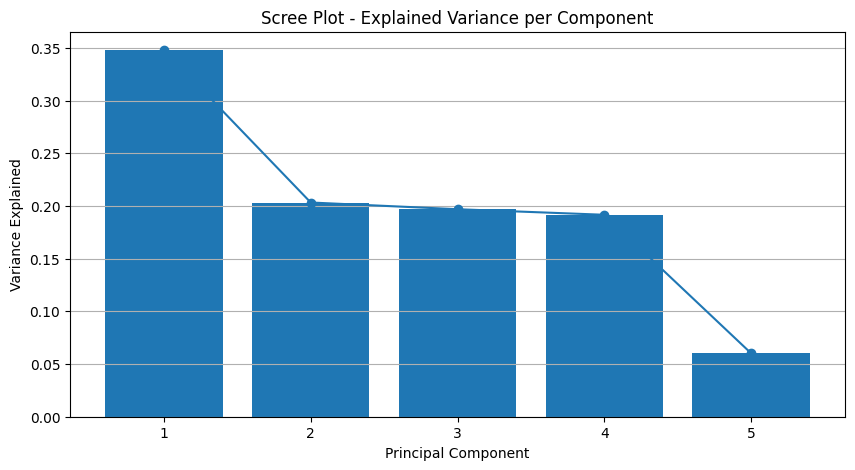

In [30]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number]).copy()

# Drop columns with too many missing values
numeric_df = numeric_df.dropna(axis=1, how='any')

numeric_df.head()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Scree Plot - Explained Variance per Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True, axis='y')
plt.show()

Total Variance

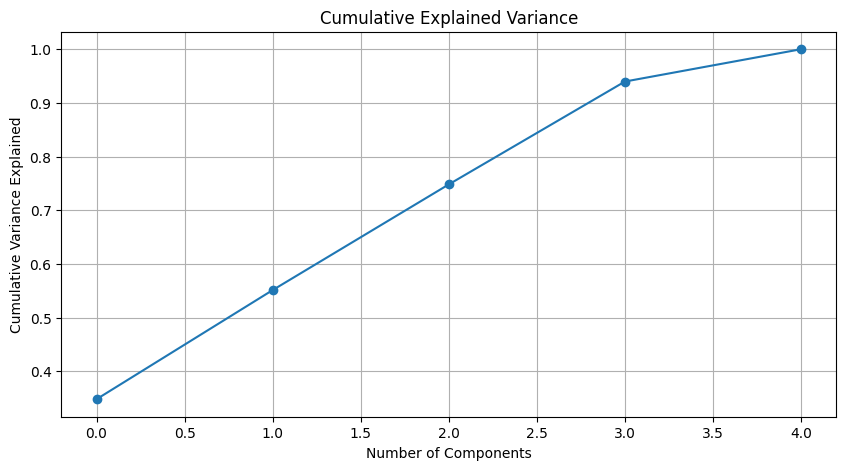

In [31]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()


Optimal Number

In [32]:
pca_tuned = PCA(n_components=0.95)  # keep 95% variance
pca_tuned_data = pca_tuned.fit_transform(scaled_data)

print("Optimal number of components =", pca_tuned.n_components_)


Optimal number of components = 5


Visualization

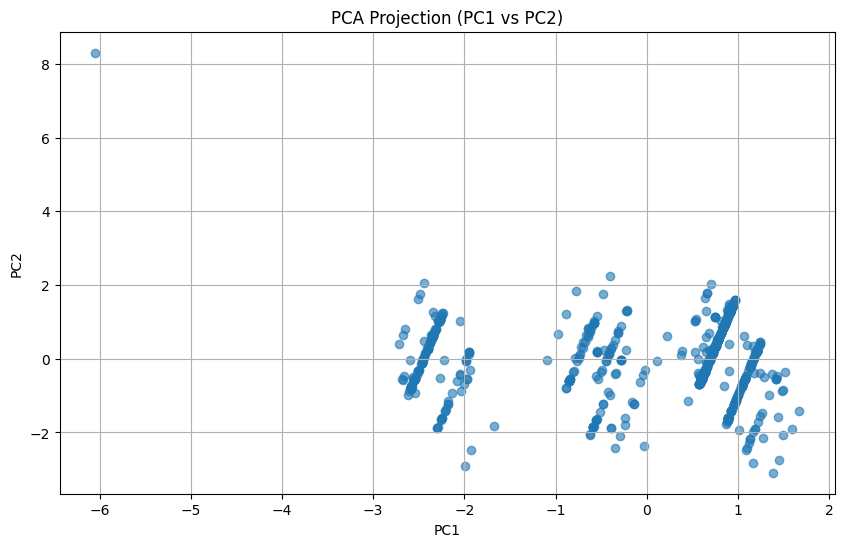

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(pca_components[:,0], pca_components[:,1], alpha=0.6)
plt.title("PCA Projection (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


Loading Matrix

In [34]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_variance))],
    index=numeric_df.columns
)

loadings.sort_values("PC1", ascending=False).head(10)


,PC1,PC2,PC3,PC4,PC5
Covered Entity Type Encoded,0.690420,-0.008570,0.105848,0.090912,0.709773
State Encoded,0.118496,0.697586,-0.326687,-0.626195,0.022083
Individuals Affected,-0.133572,0.303475,0.927721,-0.170594,0.017094
Location of Breached Information Encoded,-0.176664,0.639079,-0.101214,0.734858,0.100532
Business Associate Present,-0.678401,-0.113051,-0.105642,-0.174632,0.696660
